# Action2

#### 使用fbprophet

In [1]:
# 数据加载

In [2]:
import pandas as pd 

##### 将日期数据转换为正确的格式

In [3]:
df = pd.read_csv('user_balance_table.csv', parse_dates=['report_date'])

##### 数据探索

In [4]:
df.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840421 entries, 0 to 2840420
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   user_id              int64         
 1   report_date          datetime64[ns]
 2   tBalance             int64         
 3   yBalance             int64         
 4   total_purchase_amt   int64         
 5   direct_purchase_amt  int64         
 6   purchase_bal_amt     int64         
 7   purchase_bank_amt    int64         
 8   total_redeem_amt     int64         
 9   consume_amt          int64         
 10  transfer_amt         int64         
 11  tftobal_amt          int64         
 12  tftocard_amt         int64         
 13  share_amt            int64         
 14  category1            float64       
 15  category2            float64       
 16  category3            float64       
 17  category4            float64       
dtypes: datetime64[ns](1), float64(4), int64(13)
memory usage: 390.

##### 以时间聚合每天总的购买和赎回值

In [6]:
total_balance = df.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
total_balance

c:\users\guoxi\anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [7]:
purchase_data = total_balance[['total_purchase_amt']] #申购的金额
redeem_data = total_balance[['total_redeem_amt']] #赎回的金额

In [8]:
purchase_data

,total_purchase_amt
report_date,
2013-07-01,32488348
2013-07-02,29037390
2013-07-03,27270770
2013-07-04,18321185
2013-07-05,11648749
...,...
2014-08-27,302194801
2014-08-28,245082751
2014-08-29,267554713


In [9]:
redeem_data

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


##### 拆解数据

In [10]:
import statsmodels.api as sm

In [11]:
import matplotlib.pyplot as plt

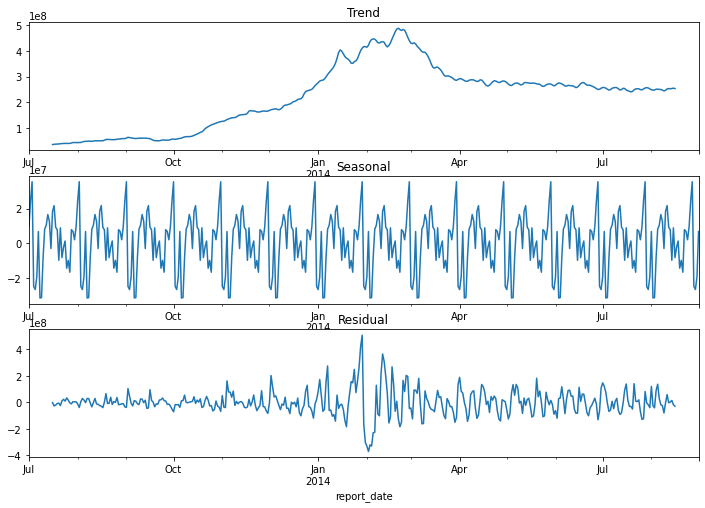

In [12]:
# 指定区间范围内的数据，进行可视化
def plot_stl(data):
    # STL返回三个部分： trend(趋势), seasonal(季节), residual(残差)
    result = sm.tsa.seasonal_decompose(data, period=30)
    
    #可视化
    fig = plt.figure(figsize=(12,8))
    axl = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax = axl, title = 'Trend')
    result.seasonal.plot(ax = ax2, title = 'Seasonal')
    result.resid.plot(ax = ax3, title = 'Residual')
plot_stl(purchase_data.total_purchase_amt)

##### 针对fbprophet模型对数据进行修改

In [13]:
purchase_data['ds'] = purchase_data.index

In [14]:
purchase_data.rename(columns={'total_purchase_amt':'y'}, inplace= True)
purchase_data

,y,ds
report_date,,
2013-07-01,32488348,2013-07-01
2013-07-02,29037390,2013-07-02
2013-07-03,27270770,2013-07-03
2013-07-04,18321185,2013-07-04
2013-07-05,11648749,2013-07-05
...,...,...
2014-08-27,302194801,2014-08-27
2014-08-28,245082751,2014-08-28
2014-08-29,267554713,2014-08-29


In [15]:
redeem_data['ds'] = redeem_data.index
redeem_data.rename(columns={'total_redeem_amt':'y'}, inplace= True)
redeem_data

,y,ds
report_date,,
2013-07-01,5525022,2013-07-01
2013-07-02,2554548,2013-07-02
2013-07-03,5953867,2013-07-03
2013-07-04,6410729,2013-07-04
2013-07-05,2763587,2013-07-05
...,...,...
2014-08-27,468164147,2014-08-27
2014-08-28,297893861,2014-08-28
2014-08-29,273756380,2014-08-29


##### 重置一下索引

In [16]:
purchase_data.reset_index(drop=True)

,y,ds
0,32488348,2013-07-01
1,29037390,2013-07-02
2,27270770,2013-07-03
3,18321185,2013-07-04
4,11648749,2013-07-05
...,...,...
422,302194801,2014-08-27
423,245082751,2014-08-28
424,267554713,2014-08-29
425,199708772,2014-08-30


In [17]:
redeem_data.reset_index(drop=True)

,y,ds
0,5525022,2013-07-01
1,2554548,2013-07-02
2,5953867,2013-07-03
3,6410729,2013-07-04
4,2763587,2013-07-05
...,...,...
422,468164147,2014-08-27
423,297893861,2014-08-28
424,273756380,2014-08-29
425,196374134,2014-08-30


##### 导入fbprophet模块

In [18]:
from fbprophet import Prophet

In [19]:
# 拟合Prophet模型
model = Prophet(weekly_seasonality=True, seasonality_prior_scale= 0.1, n_changepoints=300)

##### 使用申购数据训练模型并进行预测

In [20]:
model.fit(purchase_data)
#预测未来一个月，9月份30天
future_data = model.make_future_dataframe(periods=30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
purchase_pred = model.predict(future_data)

In [22]:
purchase_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,5.316935e+06,-7.939138e+07,1.624466e+08,5.316935e+06,5.316935e+06,4.478416e+07,4.478416e+07,4.478416e+07,4.478416e+07,4.478416e+07,4.478416e+07,0.0,0.0,0.0,5.010110e+07
1,2013-07-02,6.130193e+06,-5.860831e+07,1.711005e+08,6.130193e+06,6.130193e+06,4.754029e+07,4.754029e+07,4.754029e+07,4.754029e+07,4.754029e+07,4.754029e+07,0.0,0.0,0.0,5.367048e+07
2,2013-07-03,6.943451e+06,-7.928096e+07,1.632276e+08,6.943451e+06,6.943451e+06,3.765704e+07,3.765704e+07,3.765704e+07,3.765704e+07,3.765704e+07,3.765704e+07,0.0,0.0,0.0,4.460049e+07
3,2013-07-04,7.756709e+06,-9.592767e+07,1.409612e+08,7.756709e+06,7.756709e+06,1.949542e+07,1.949542e+07,1.949542e+07,1.949542e+07,1.949542e+07,1.949542e+07,0.0,0.0,0.0,2.725213e+07
4,2013-07-05,8.569967e+06,-1.221045e+08,1.077130e+08,8.569967e+06,8.569967e+06,-1.786291e+07,-1.786291e+07,-1.786291e+07,-1.786291e+07,-1.786291e+07,-1.786291e+07,0.0,0.0,0.0,-9.292942e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,1.988989e+08,5.370985e+07,2.922686e+08,1.972406e+08,2.005172e+08,-1.786291e+07,-1.786291e+07,-1.786291e+07,-1.786291e+07,-1.786291e+07,-1.786291e+07,0.0,0.0,0.0,1.810360e+08
453,2014-09-27,1.981407e+08,1.888488e+07,2.401388e+08,1.963773e+08,1.998813e+08,-6.945950e+07,-6.945950e+07,-6.945950e+07,-6.945950e+07,-6.945950e+07,-6.945950e+07,0.0,0.0,0.0,1.286812e+08
454,2014-09-28,1.973826e+08,2.452805e+07,2.428596e+08,1.955089e+08,1.992327e+08,-6.215451e+07,-6.215451e+07,-6.215451e+07,-6.215451e+07,-6.215451e+07,-6.215451e+07,0.0,0.0,0.0,1.352281e+08
455,2014-09-29,1.966244e+08,1.265066e+08,3.591999e+08,1.946264e+08,1.985816e+08,4.478416e+07,4.478416e+07,4.478416e+07,4.478416e+07,4.478416e+07,4.478416e+07,0.0,0.0,0.0,2.414086e+08


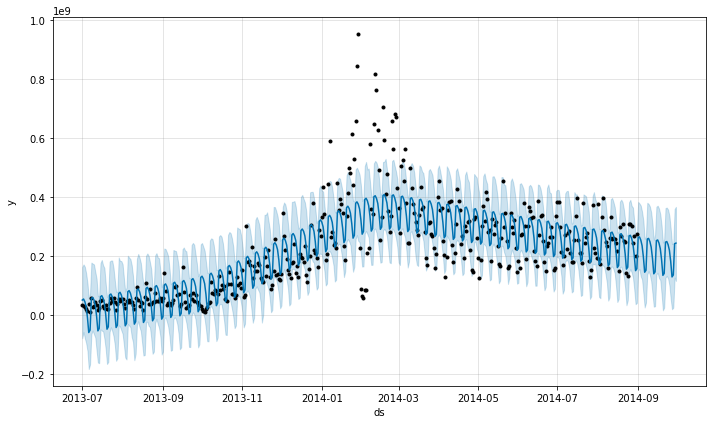

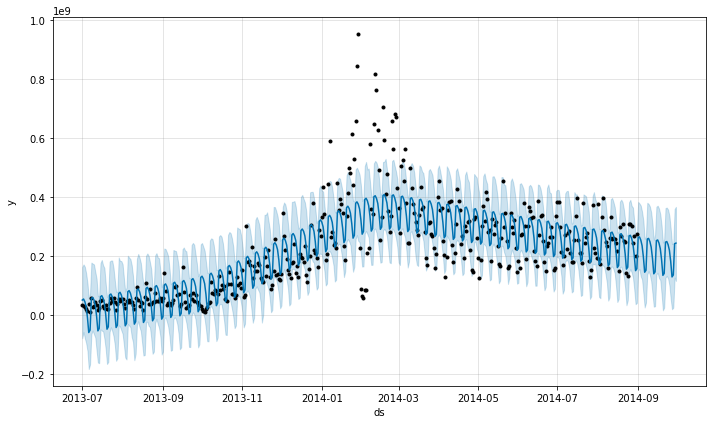

In [23]:
model.plot(purchase_pred)

##### 对赎回进行预测

In [24]:
# 拟合Prophet模型
model2 = Prophet(weekly_seasonality=True, seasonality_prior_scale= 0.1, n_changepoints=300)
model2.fit(redeem_data)
#预测未来一个月，9月份30天
future_data = model2.make_future_dataframe(periods=30)
redeem_pred = model2.predict(future_data)
redeem_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.555331e+07,-4.407123e+07,1.234825e+08,-1.555331e+07,-1.555331e+07,4.895702e+07,4.895702e+07,4.895702e+07,4.895702e+07,4.895702e+07,4.895702e+07,0.0,0.0,0.0,3.340371e+07
1,2013-07-02,-1.481315e+07,-7.802106e+07,8.944806e+07,-1.481315e+07,-1.481315e+07,2.272993e+07,2.272993e+07,2.272993e+07,2.272993e+07,2.272993e+07,2.272993e+07,0.0,0.0,0.0,7.916778e+06
2,2013-07-03,-1.407299e+07,-7.617256e+07,9.709128e+07,-1.407299e+07,-1.407299e+07,2.487504e+07,2.487504e+07,2.487504e+07,2.487504e+07,2.487504e+07,2.487504e+07,0.0,0.0,0.0,1.080205e+07
3,2013-07-04,-1.333284e+07,-8.606842e+07,7.455182e+07,-1.333284e+07,-1.333284e+07,6.121456e+06,6.121456e+06,6.121456e+06,6.121456e+06,6.121456e+06,6.121456e+06,0.0,0.0,0.0,-7.211380e+06
4,2013-07-05,-1.259268e+07,-9.762970e+07,6.434102e+07,-1.259268e+07,-1.259268e+07,-4.512266e+06,-4.512266e+06,-4.512266e+06,-4.512266e+06,-4.512266e+06,-4.512266e+06,0.0,0.0,0.0,-1.710494e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.908475e+08,1.979872e+08,3.655147e+08,2.902178e+08,2.915207e+08,-4.512266e+06,-4.512266e+06,-4.512266e+06,-4.512266e+06,-4.512266e+06,-4.512266e+06,0.0,0.0,0.0,2.863353e+08
453,2014-09-27,2.910096e+08,1.468113e+08,3.195728e+08,2.903476e+08,2.917396e+08,-5.844798e+07,-5.844798e+07,-5.844798e+07,-5.844798e+07,-5.844798e+07,-5.844798e+07,0.0,0.0,0.0,2.325616e+08
454,2014-09-28,2.911716e+08,1.635831e+08,3.454855e+08,2.904705e+08,2.919383e+08,-3.972321e+07,-3.972321e+07,-3.972321e+07,-3.972321e+07,-3.972321e+07,-3.972321e+07,0.0,0.0,0.0,2.514484e+08
455,2014-09-29,2.913337e+08,2.591828e+08,4.266387e+08,2.905964e+08,2.921487e+08,4.895702e+07,4.895702e+07,4.895702e+07,4.895702e+07,4.895702e+07,4.895702e+07,0.0,0.0,0.0,3.402907e+08


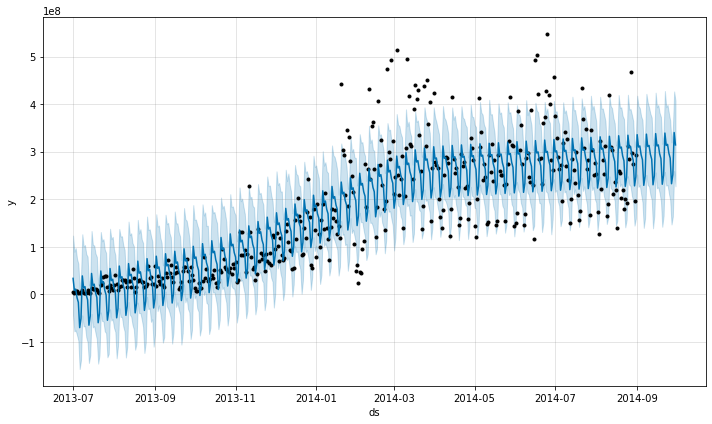

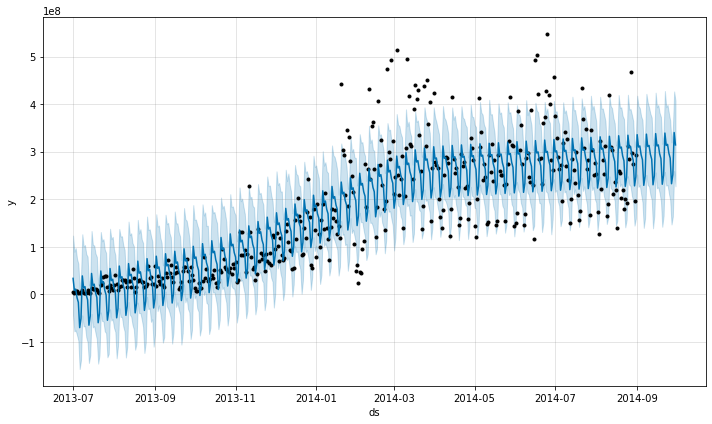

In [25]:
model2.plot(redeem_pred)

In [26]:
purchase_data2 = purchase_pred[(purchase_pred['ds'] >= '2014-09-01') & (purchase_pred['ds'] <= '2014-09-30')][['ds','yhat']]

In [27]:
purchase_data2

,ds,yhat
427,2014-09-01,2.626367e+08
428,2014-09-02,2.646346e+08
429,2014-09-03,2.539932e+08
430,2014-09-04,2.350735e+08
431,2014-09-05,1.969570e+08
432,2014-09-06,1.446023e+08
433,2014-09-07,1.511491e+08
434,2014-09-08,2.573296e+08
435,2014-09-09,2.593276e+08
436,2014-09-10,2.486862e+08


In [28]:
redeem_data2 = redeem_pred[(redeem_pred['ds'] >= '2014-09-01') & (redeem_pred['ds'] <= '2014-09-30')][['ds','yhat']]
redeem_data2

,ds,yhat
427,2014-09-01,3.357534e+08
428,2014-09-02,3.096884e+08
429,2014-09-03,3.119955e+08
430,2014-09-04,2.934040e+08
431,2014-09-05,2.829323e+08
432,2014-09-06,2.291587e+08
433,2014-09-07,2.480455e+08
434,2014-09-08,3.368877e+08
435,2014-09-09,3.108227e+08
436,2014-09-10,3.131299e+08


In [29]:
# 合并结果

In [30]:
result = pd.DataFrame()
result['ds'] = purchase_data2.ds
result['purchase_amt'] = purchase_data2.yhat

In [31]:
result['redeem_amt'] = redeem_data2.yhat
result

,ds,purchase_amt,redeem_amt
427,2014-09-01,2.626367e+08,3.357534e+08
428,2014-09-02,2.646346e+08,3.096884e+08
429,2014-09-03,2.539932e+08,3.119955e+08
430,2014-09-04,2.350735e+08,2.934040e+08
431,2014-09-05,1.969570e+08,2.829323e+08
432,2014-09-06,1.446023e+08,2.291587e+08
433,2014-09-07,1.511491e+08,2.480455e+08
434,2014-09-08,2.573296e+08,3.368877e+08
435,2014-09-09,2.593276e+08,3.108227e+08
436,2014-09-10,2.486862e+08,3.131299e+08


In [37]:
result['ds'] = result['ds'].apply(lambda x: str(x).replace('-','')[0:8])

In [38]:
result

,ds,purchase_amt,redeem_amt
427,20140901,2.626367e+08,3.357534e+08
428,20140902,2.646346e+08,3.096884e+08
429,20140903,2.539932e+08,3.119955e+08
430,20140904,2.350735e+08,2.934040e+08
431,20140905,1.969570e+08,2.829323e+08
432,20140906,1.446023e+08,2.291587e+08
433,20140907,1.511491e+08,2.480455e+08
434,20140908,2.573296e+08,3.368877e+08
435,20140909,2.593276e+08,3.108227e+08
436,20140910,2.486862e+08,3.131299e+08


In [39]:
result.to_csv('prophet.csv',header = None, index = False)